<a href="https://colab.research.google.com/github/ManuelGDS/Simulacion-1/blob/main/Aproximaci%C3%B3n_de_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **González de Santiago José Manuel**#

# **Aproximación de $\pi$: Por simulación**#

In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

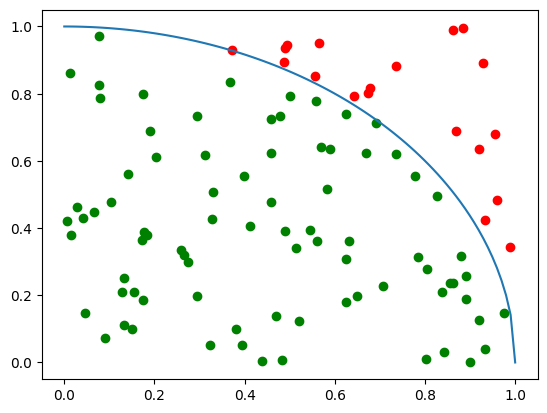

In [2]:
#Muestra del experimento

x = np.linspace(0,1,100)
plt.plot(x,np.sqrt(1-x**2))
for i in range(100):
  u1=rnd.random()
  u2 = rnd.random()
  if u2 <=np.sqrt(1-u1**2):
    plt.scatter(u1,u2,color="green")
  else:
    plt.scatter(u1,u2,color="red")
plt.show()

In [3]:

#Esta función la utilice para el histograma
def estimacion(n):
  contador = 0
  lista = []
  for i in range(1,n):
    u_1 =  rnd.random()
    u_2 =  rnd.random()
    operacion = np.sqrt(1-u_1**2)
    if u_2 <= operacion :
      contador += 1
    x = (4*(contador/i))
    lista.append(x)
  return lista[-1]

In [4]:
def simulacion(M):
  r = []
  for i in range(M):
    R =estimacion(500)
    r.append(R)
  return r

(array([ 1.,  0.,  1.,  3.,  2.,  4.,  4.,  7.,  8.,  8., 18.,  8., 11.,
        32., 27., 23., 43., 45., 27., 41., 74., 49., 45., 76., 43., 34.,
        93., 26., 30., 33., 52., 13., 25., 34., 11.,  7., 14.,  8.,  2.,
         8.,  5.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([2.90180361, 2.91222445, 2.92264529, 2.93306613, 2.94348697,
        2.95390782, 2.96432866, 2.9747495 , 2.98517034, 2.99559118,
        3.00601202, 3.01643287, 3.02685371, 3.03727455, 3.04769539,
        3.05811623, 3.06853707, 3.07895792, 3.08937876, 3.0997996 ,
        3.11022044, 3.12064128, 3.13106212, 3.14148297, 3.15190381,
        3.16232465, 3.17274549, 3.18316633, 3.19358717, 3.20400802,
        3.21442886, 3.2248497 , 3.23527054, 3.24569138, 3.25611222,
        3.26653307, 3.27695391, 3.28737475, 3.29779559, 3.30821643,
        3.31863727, 3.32905812, 3.33947896, 3.3498998 , 3.36032064,
        3.37074148, 3.38116232, 3.39158317, 3.40200401, 3.41242485,
        3.42284569]),
 <BarContainer

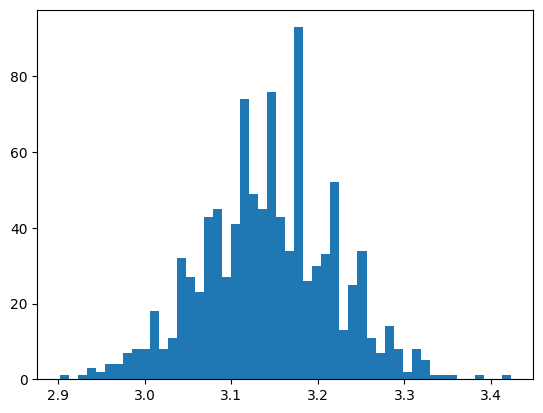

In [5]:
S = simulacion(1000)
plt.hist(S, bins=50)

In [6]:
def num_pi():
  contador = 0
  u1 = rnd.random()
  u2 = rnd.random()
  if u2 <= np.sqrt(1-u1**2):
    contador += 1
  return contador

In [7]:
num_pi()

1

In [8]:
def probabilidad(n):
  prob = []
  inter = 0
  for i in range(n):
    inter += num_pi()
    prob.append(4*(inter/(i+1)))
  return prob

In [9]:
X = probabilidad(600)

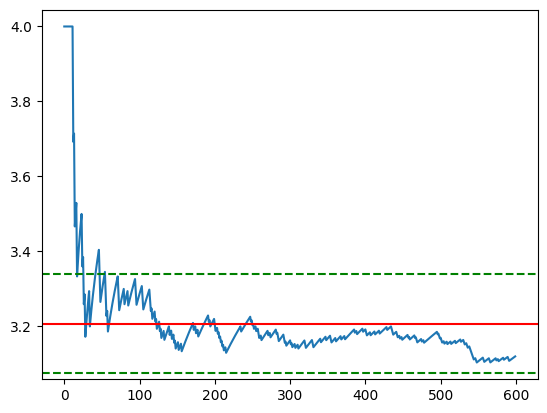

In [10]:
plt.plot(X)
plt.axhline(y=np.mean(X), color='r', linestyle='-')
plt.axhline(y=(np.mean(X))-(np.std(X)), color='g', linestyle='--')                       # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
plt.axhline(y=(np.mean(X))+(np.std(X)), color='g', linestyle='--')                                  # Sin embargo, diferentes ejecuciones darán resultados distintos

In [11]:
print(np.mean(X), np.std(X))

3.2077456045839043 0.13220883282514834


# **Aproximación de $\pi$: Analíticamente**#

Consideremos la variable:

$f(x) = \begin{cases}
1 & \text{si el dado cae dentro de p } \\
0 & \text{si ace fuera de (1-p) }
\end{cases}$

$E[X_i]=1-p + 0(1-p)=p$

$V[X_i]=E[x_i^2]-E[x_i]^2$

$=(1^2\cdot p + 0^2(1-p))-p^2$

$=p-p^2=p(1-p)$

Ahora consideramos

$Z = 4 \cdot\frac{x_1+x_2+...+x_N}{N}$

y Calculamos el valor esperado y la varianza

$E[z]=\frac{4}{N}(E[x_1]+...+E[x_N])$

$E[z]=\frac{4}{N}\cdot Np=4p$

$\therefore E[z]=4p$

$V[z]=\frac{16}{N^2}(V[X_1]+...+v[X_N])$

$V[z]=\frac{16}{N^2}\cdot Np(1-p)$

$V[z]=\frac{16p(1-p)}{N}$

Ahora podemos usar la desigualdad de Chebyshev

$P(|Z_N-\pi|\geq \epsilon)\leq \frac{V[z_n]}{\epsilon^2}$

$P(|Z_N-\pi|\geq \epsilon)\leq \frac{16p(1-p)}{N\epsilon^2}$

**Nota:** Epsilon es el error o la desviación estandar

Luego le damos un valor de $\epsilon$ podemos calcular el valor de N